# Raport końcowy z projektu AAL
### Wojciech Celej

 ## 1. Opis problemu

#### LS łamana
W układzie współrzędnych XY znajduje się $n$ punktów. Każdy punkt ma przypisaną wagę będącą liczbą naturalną. Należy znaleźć ciąg punktów o następujących właściwościach:
* każdy wektor pomiędzy kolejnymi punktami z ciągu ma nieujemne składowe,
* łączna suma wag punktów w ciągu jest maksymalna.  
Rozważyć też przypadek, w którym pierwszy warunek jest rozluźniony w następujący sposób:
* każdy wektor z wyjątkiem co najwyżej jednego pomiędzy kolejnymi punktami z ciągu ma nieujemne składowe.

## 2. Algorytm

1. Punkt na płaszczyźnie ma 4 parametry: unikalny numer, x, y, wagę.
1. Uszeregowanie punktów względem współrzędnej x -> presortowanie.
1. Idąc miotłą od prawej od lewej po osi X i zamiatając kolejne punkty:
   * w trakcie tego zamiatania do drzewa binarnego wstawiany będzie dany punkt wraz ze swoim numerem oraz wartością określającą potencjalną maksymalną ścieżkę startującą z tego punku (ozn. `rankingScore`)
   * do hash mapy wstawiany będzie numer punktu znajdującego się o jeden wyżej w drzewie binarnym od punktu wstawianego.
   * drzewo binarne będzie uszeregowana rosnąco według współrzędnej y -> kluczem jest współrzędna y punktu, wartością obiekt przechowujący informację o numerze punktu i jego wartości `rankingScore`
   * kluczem w hash mapie jest numer punktu, wartością numer następnego punktu w maksymalnej ścieżce
   * wstawiając punkt do drzewa binarnego, ustawiamy `rankingScore` dla tego punktu jako `rankingScore` punktu wyżej w drzewie + waga wstawianego punktu
   * usuwamy wszystkie punkty z drzewa o mniejszym kluczu od wstawionego, dla których `rankingScore` jest mniejszy od `rankingScore` wstawianego (każdy kolejny zamieciony punkt jeśli był przez nie zdominowany, będzie zdominowany także przez ten wstawiony)
1. Po takim przejściu otrzymuje się łączną sumę wag punktów jako `rankingScore` pierwszego punktu w drzewie.  
Ścieżkę można odtworzyć za pomocą danych zgromadzonych w hash mapie.

## 3. Budowa projektu

1. Pliki nagłówkowe: `/include`:
    * `Types.h` - deklaracja struktur danych używanych globalnie
2. Pliki źródłowe: `/src` (każdy plik poza `main.cpp` ma swój plik nagłówkowy i implementuje jedną klasę o analogicznej nazwie)
    * `main.cpp` - obsługa wejścia/wyjścia, uruchomienie algorytmu w odpowiednim trybie
    * `MyAlgorithm.cpp` - implementacja silnika algorytmu, dostęp do wyników
    * `Point.cpp` - klasa opisująca punkt na płaszczyźnie
    * `PointsGenerator.cpp` - generator wektora `n` punktów
    * `Vertex.cpp` - klasa opisująca numer punktu i jego wartość `rankingScore`
3. Plik `CMakeLists.txt` - ustawienia budowania projektu
4. Plik `README.md` - opis projektu

## 4. Złożoność

1. Skopiowanie wektora punktów - $O(n)$
2. Posortowanie punktów po współrzędnej x - $O(nlog(n))$
3. Przemiecenie punktów po współrzędnej x od prawej do lewej - $O(n)$:
    * znalezienie miejsca gdzie należy wstawić punkt do drzewa binarnego (w C++ `std::map` jest to drzewo czerwono-czarne) - $O(log(n))$
    * wstawienie numeru następnika do hash mapy - $O(1)$
    * usunięcie punktów o mniejszym kluczu i mniejszej wartości `rankingScore` od wstawionego do drzewa - tutaj problem złożoności nie jest trywialny, może się zdażyć przypadek, że złożoność ta dla jednego wstawienia wyniesie $O(n)$ a może nawet i $O(nlog(n))$ w zależności od implementacji iteratora w drzewie czerwono-czarnym w STL; złożoność amortyzowana jest mniejsza od liniowej, ale większa od logarytmicznej - pokazuje to niedoszacowanie w ocenie $T(n)$
    
Postulowana złożoność: $T(n) = O(nlog(n))$

## 5. Uruchomienie programu

#### Komendy:
1. wg danych dostarczonych ze strumienia wejściowego (standardowego lub pliku) dla sekwencji konkretnych problemów; ten tryb pozwala testować poprawności dla małych instancji
1. wg danych generowanych automatycznie (losowo) z ewentualną parametryzacją generacji określaną przez użytkownika; ten tryb także służy do testowania poprawności

    Wynikiem działania w obu trybach jest plik z wartością sumy wag maksymalnej ścieżki oraz ścieżka ją realizująca.
1. wykonanie z generacją danych, pomiarem czasu i prezentacją wyników pomiarów. Wynikiem działania są 2 kolumny: 1. zawierająca rozmiar problemu, 2. zmierzony czas.

Tryb wykonania programu ustawia się wywołując program z flagą `-m`. Przykładowe wywołania:

* `./prog -m1 <points.txt >>out.txt` - powoduje uruchomienie programu w wersji wykonania nr 1 i zwrócenie wyniku do pliku `out.txt`
* `./prog -m2 -n100 >>out.txt` - powoduje uruchomienie programu w trybie 2. dla problemu o rozmiarze $n=100$
* `./prog -m3 -n1000 -k30 -s500 -r10` - pomiar czasu dla $k=30$ problemów o wielkościach $n = 1000, 1500, 2000, ...$ Dla każdej wielkości losowanych jest $r=10$ instancji problemu.

Aby wywołać program w odpowiednim trybie, trzeba podać wszystkie parametry.

#### Opis wejścia/wyjścia dla poszczególnych trybów:
* W 1. trybie dane wejściowe powinny być zgrupowane w pliku o strukturze 4 kolumn: 
    * 1.kolumna oznacza numer (uniklany, jednoznacznie identyfikujący punkt) - typu `int`
    * 2.kolumna oznacza współrzędną x - typu `double`
    * 3.kolumna oznacza współrzędną y - typu `double`
    * 4.kolumna oznacza wagę punkut, wartość musi być większa od 0 - typu `int`
    Wyjście programu drukuje sprarsowane dane, podaje wartość maksymalnej ścieżki i drukuje tę ścieżkę
* W 2. i 3. trybie dane są losowane przez generator instancji problemu. Jest za to odpowiedzialna klasa `PointsGenerator`. Umozliwia on ustawienie zakresów losowania dla owpowiednio współrzędnych x, y i wartości wagi. Dane są losowane z rozkładu jednostajengo. Domyślne zakresy generatora to $[-10.0 ; 10.0]$ dla współrzędnych, $[0; 100]$ dla numerów punktów.  
Dane wyjściowe dla 2.trybu są analogiczne jak dla trybu 1. Dane wyjściowe dla trybu 3. zgrupowane są w dwie kolumny:
    * 1.kolumna zawiera rozmiar problemu $N$
    * 2.kolumna zawiera zmierzony czas $t(n)$ w jednostkach `chrono::duration<double>`
    
#### Przykładowe wywołania

**1. tryb**

![](mode1Example.png)

**2. tryb**

![](mode2Example.png)

**3. tryb**

![](mode3Example.png)

## 6. Analiza złożoności

Pomiar złożoności został wykonany dla problemów o rozmiarach $n = 100, 200, 300, ..., 12000$. Dla każdego $n$ dokonano 50 pomiarów i policzono średnią. Do pomiaru czasu użyto `chrono::high_resolution_clock` z STL.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("darkgrid")
sns.set_context("talk")

In [5]:
df = pd.read_csv("out.txt", sep = "\t", header = None)
df.columns = ["N", "t(n)"]
median = 6000

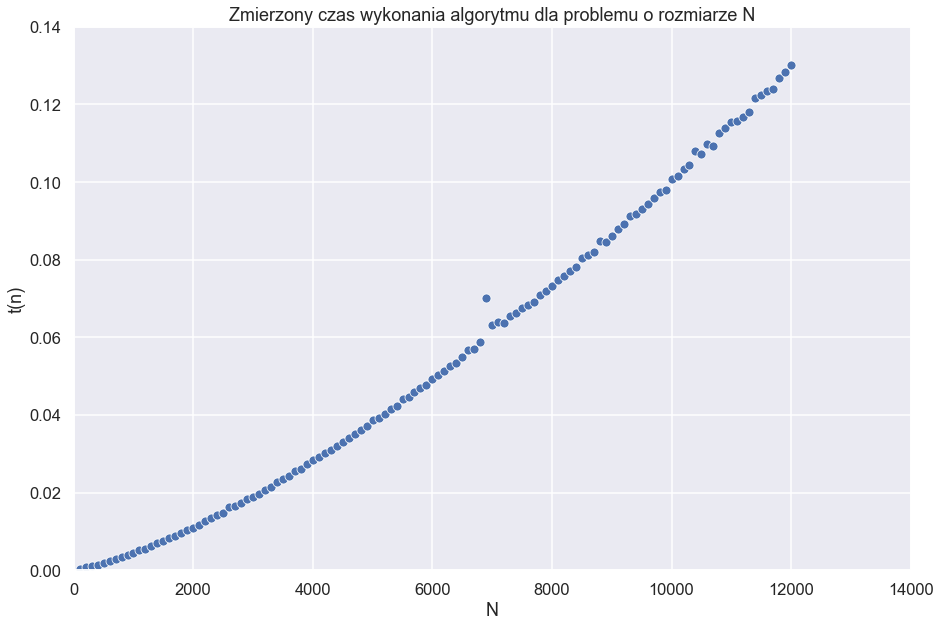

In [6]:
sns.scatterplot(data=df, x="N", y="t(n)")
plt.ylim(0, 0.14)
plt.xlim(0, 14000)
plt.title("Zmierzony czas wykonania algorytmu dla problemu o rozmiarze N")
plt.show()

Postulowana złożoność T(n):

In [7]:
def T(n):
    return n*np.log2(n)

Badanie złożoności zostanie przeprowadzone w oparciu o wzór:
$$q(n) = \frac{t(n}{cT(n)} = \frac{t(n) T(n_{mediana})}{T(n) t(n_{mediana})}$$

In [8]:
TMedian = T(median)
tMedian = float(df.loc[df.N == median].loc[:, "t(n)"])

In [9]:
df.loc[:, "q(n)"] = df.loc[:, "t(n)"]/T((df.loc[:, "N"]))*TMedian/tMedian

In [10]:
df

,N,t(n),q(n)
0,100,0.000283,0.650525
1,200,0.000729,0.729371
2,300,0.001013,0.627218
3,400,0.001380,0.610237
4,500,0.001801,0.614299
5,600,0.002330,0.643283
6,700,0.002787,0.644029
7,800,0.003366,0.667059
8,900,0.003863,0.668566
9,1000,0.004473,0.686201


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


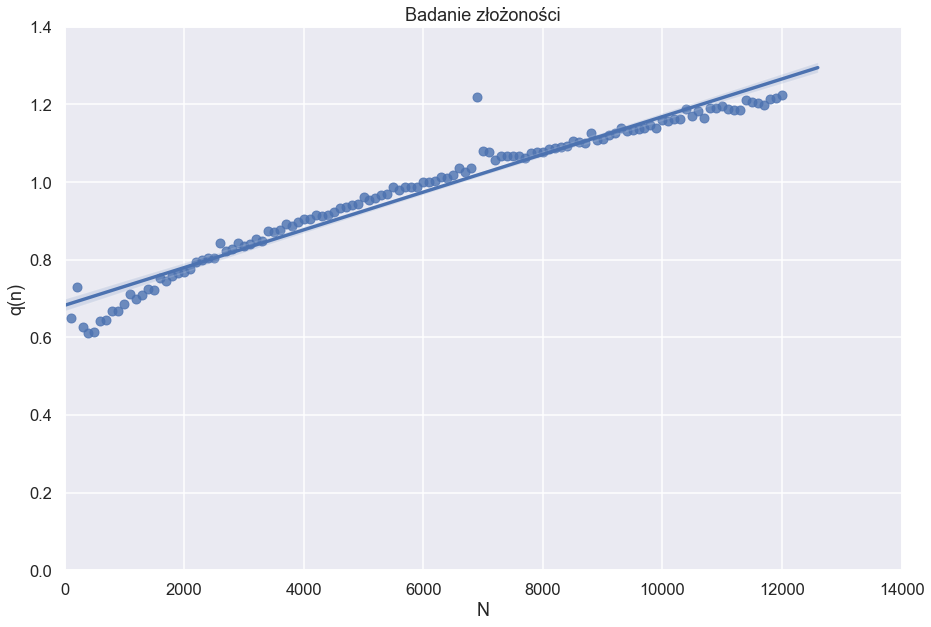

In [11]:
sns.regplot(data=df, x="N", y="q(n)")
plt.ylim(0, 1.4)
plt.xlim(0, 14000)
plt.title("Badanie złożoności")
plt.show()

Charakterystyka $q(n)$ ma charakter rosnący, co świadczy o niedoszacowaniu złożoności. Punkty pomiarowe układają się jednak w krzywą wklęsłą. Dodatkowo pomiary przeprowadzono dla szerokiego zakresu $N$.